# Module 11 In-Class Exercises: Hierarchical Clustering

### In this exerices, we are going to conudct hierarchical clustering analysis using scipy cluster hierarchical package.


In [2]:
# import required packages for this chapter

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


## University Rankings


The dataset on American College and University Rankings (available from www.dataminingbook.com) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements, including continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or public school).

Note that many records are missing some measurements. Our first goal is to estimate these missing values from "similar" records. This will be done by clustering the complete records and then finding the closest cluster for each of the partial records. The missing values will be imputed from the information in that cluster.

In [3]:
# Load the university data
# Let’s begin by loading the data into a pandas DataFrame named univ. Print passengers and inspect the columns.
univ_df=pd.read_csv("C:/Users/erwin/Desktop/MIS536/Module11/universities.csv")

print(univ_df.head())
print(univ_df.shape)


                        College Name State  Public (1)/ Private (2)  \
0          Alaska Pacific University    AK                        2   
1  University of Alaska at Fairbanks    AK                        1   
2     University of Alaska Southeast    AK                        1   
3  University of Alaska at Anchorage    AK                        1   
4        Alabama Agri. & Mech. Univ.    AL                        1   

   # appli. rec'd  # appl. accepted  # new stud. enrolled  \
0           193.0             146.0                  55.0   
1          1852.0            1427.0                 928.0   
2           146.0             117.0                  89.0   
3          2065.0            1598.0                1162.0   
4          2817.0            1920.0                 984.0   

   % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
0                      16.0                      44.0           249.0   
1                       NaN                       NaN       

In [9]:
# drop missing values
print('Before:  ',  univ_df.shape)

universities_df=univ_df.dropna(axis=0)
print('After: ', universities_df.shape)

Before:   (1302, 20)
After:  (471, 20)


For all the continuous measurements, run hierarchical clustering using complete linkage and Euclidean distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data?


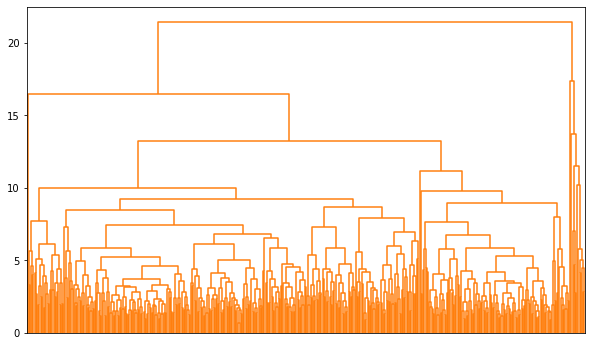

In [11]:
# Reduce to continuous measurements and normalize data

reduced_df=universities_df.drop(columns=['College Name','State','Public (1)/ Private (2)'])
universities_norm=(reduced_df - reduced_df.mean())/reduced_df.std()  #normalize data by taking the data subtracting the data's mean & dividing it by the data's standard deviation

# Hierarchical clustering using complete linkage and Euclidean distance

Z=linkage(universities_norm, method='complete', metric='euclidean')

fig=plt.figure(figsize=(10,6))
dendrogram(Z,no_labels=True, color_threshold=55)
plt.show()





In [14]:
# try splitting into different number of clusters

memb=fcluster(Z, 2, criterion='maxclust')
np.unique(memb, return_counts=True)

(array([1, 2], dtype=int32), array([458,  13], dtype=int64))

In [16]:
np.unique(fcluster(Z, 4, criterion='maxclust'), return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([457,   1,  12,   1], dtype=int64))

If we select #clusters = 2, we have on big cluster and one small cluster.
Looking at the same dendrogram, we see that 4 clusters is also a possibility,
on similar grounds. The following analysis is for 2 clusters, but a similar 
analysis could be conducted for different number of clusters.


Compare the summary statistics for each cluster and describe each cluster in this context (e.g., "Universities with high tuition, low acceptance rate...").  (_Hint_: To obtain cluster statistics for hierarchical clustering, use the pandas method _groupby(clusterlabel)_ together with methods such as _mean_ or _median_.) 


In [17]:
centroids={}

for key, item in reduced_df.groupby(memb):
    centroids['Cluster {}'.format(key)]=item.mean()
    
pd.DataFrame(centroids).round(2)


,Cluster 1,Cluster 2
# appli. rec'd,2747.43,17235.23
# appl. accepted,1790.03,11678.38
# new stud. enrolled,683.45,4207.00
% new stud. from top 10%,27.81,35.15
% new stud. from top 25%,55.27,69.08
# FT undergrad,3078.83,20618.54
# PT undergrad,684.05,4792.69
in-state tuition,9480.30,6811.38
out-of-state tuition,10579.12,10435.54
room,2214.19,2464.85
